# Random Forest Classifier

This is the second of the series on classic classifiers.

- Support Vector Classifier (SVC)
- **Random Forest Classifier (RFC)**
- Multilayer Perceptron (MLP)

The RFC method is a non-parametric machine learning method. This is an ensemble method averaging multiple decision trees, so let me start from there.

If you just wish to grab a code for RFC (like my future self), here is a <a href="#code">wormhole</a>.

The codes and the example are motivated from *Fundamentals of Machine Learning* by Thomas P. Trappenberg.

## Preliminary: Decision Trees

What we eventually wish to achieve with a decision tree is intuitively somewhat similiar to SVM. We start with a labeled sample data for training the decision tree classifier, and we still wish to draw lines (or place hyperplanes as we saw from <a href="Support-Vector_Machines.html">SVM</a>) and say "hey, if the observation is on this side of the line, we predict it to be in class A, otherwise 'not A' for the moment." This type of yes/no branches occur each time we set a new classifying hyperplane, and we'll in particular apply theese yes/no gates in a sequential order determined by data so that the whole decision making process can be presented using a tree diagram.

So how does the decision tree algorithm places a classifying hyperplane?

Unlike SVM where a hyperplane could be placed in any location and direction in the feature space to determine the best split, RFC only places hyperplanes in particular direction: Basically for each attribute axis, we place a hyperplane perpendicular to it (a normal vector to the hyperplane is always pararell to the corresponding axis).

For example, if $X_1$ is the first attribute of our data set, the decision tree algorithm would find a constant $c$ such that, if a sample has the first attribute value $X_1 > c$, we predict it to be in class A, otherwise, pass the sample to the next yes/no gate.

So the heart of this algorithm is to determine the constant $c$ for each attribute at each yes/no branch in a decision tree.

There are multiple ways to determine $c$, and `sklearn` offers two common practices, Gini impurity and entropy ("information gain"). By default, `sklearn.tree.DecisionTreeClassifier` uses Gini impurity as a criterion, see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">here</a>.

## Gini impurity

`sklearn` uses the Gini impurity $G$ by default as a measure of how diverse the data are,
$$G = 1 - \sum_y p^2(y).$$
- High $G$: There are many categories in the data.
- Low $G$: Most of the data belong to a single category.

Computing $G$ is numerically less demanding then the entropy $H$ which is used in measureing information gain described below.

The idea behind the formula of $G$ is as follows:
- From the data, we can estimate the probability $p(y)$ of the occurence of a label $y$.
- Suppose a sample is picked from the data and we randomly assign a predicted label on it based on the distribution of $p(y)$ for all labels $y$.
- If the picked sample has the true label $y = k$ with the probability $p(k)$, the probability that we would mislabel it will be
$$\sum_{i \not= k} p(i) = 1 - p(k).$$
- We have a $p(k)$ chance to pick a sample from the class $k$ and $1 - p(k)$ chance to mislabel it, so for all classes $k = 1, ..., n$,
$$\sum_{k = 1}^n p(k) \big( 1 - p(k) \big) = G.$$
- $G$ is at its minimum (zero) if all the data fall into a single class.

## Information gain

`sklearn` also offers an option to use information gain as the criterion. The information gain is the difference between the entropy before the split and after the split.

The entropy describes how uniform the data are.
- High entropy: the energy is uniformly distributed.
- Low entropy: the energy is locally grouped.

So the decision criterion can be described as the following:
- Before the split at $X_1 = c$, measure the entropy $H$ (We'll se how it's measured later).
- After the split, we will have two partitions. Measure the weighted average of the entropy of these two partitions (weight given by the volume of each partition).
- If the data was locally grouped before the split and the split made the local group occupy the entire volume of one of the new partitions, then we should have two partitions each with uniformly distributed information.
- In terms of the entropy, it was low before the split (not uniformly distributed information), but high after the split (two uniformly distributed information chambers).

Thus if the difference is positive and high, we can say we have done the partitioning correctly. Of course the aim is to maximize the difference.

So how do we calculate entropy then?

The Shannon entropy is formally calculated as
$$H = - \sum_y p(y) \ln \big( p(y) \big)$$
where $p(y)$ is the probability that the label $y$ occurs in the data.

## RFC

Trees form a forest. The main weakness of the decision tree method is that it overfits often (low bias, but high variance). RFC was designed to overcome this weakness by randomly choosing multiple portions of the data and training a decision tree on each of these portions, then averaging the result. This technique is called bagging (or bootstrap aggregating), conceptually very similar to cross-validation.

<a name="code"></a>

Alright, it's time to take a look at the code in action!

First prepare a labeled data. We'll use the iris data agian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
x_train = iris.data[0:-1:2]
y_train = iris.target[0:-1:2]
x_test = iris.data[1:-1:2]
y_test = iris.target[1:-1:2]

print(x_train.shape)
print(x_test.shape)
print(iris.data.shape)

(75, 4)
(74, 4)
(150, 4)


Let's try a single decision tree first.

Percentage correct (accuracy) of DTC :  0.9594594594594594


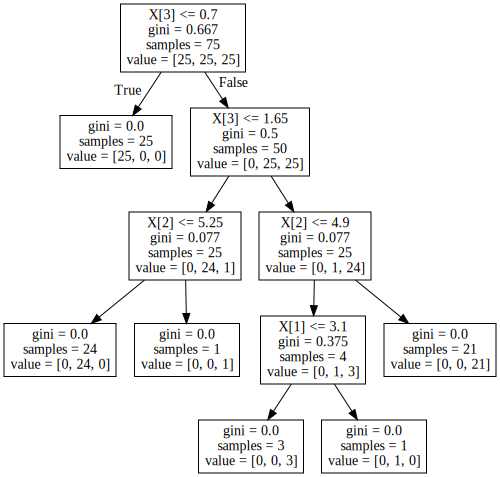

In [3]:
# Decision tree classifier
from sklearn import tree

# model
model = tree.DecisionTreeClassifier()
# train
model.fit(x_train, y_train)
# prediction
y_predicted = model.predict(x_test)
# evaluation
print('Percentage correct (accuracy) of DTC : ', np.mean(y_test == y_predicted))

import graphviz

dot_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(dot_data)
graph

Now we'll use `sklearn.ensemble.RandomForestClassifier()`.

By default, it's going to use `criterion = 'gini'`. One can make a change to use the informaion gain by setting `criterion = 'entropy'`.

In [4]:
# RFC
from sklearn.ensemble import RandomForestClassifier

# model
model = RandomForestClassifier(n_estimators = 10)
# train
model.fit(x_train, y_train)
# prediction
y_predicted = model.predict(x_test)
# evaluation
print('Percentage correct accuracy of RFC: ', np.mean(y_test == y_predicted))

Percentage correct accuracy of RFC:  0.972972972972973


RFC showed a slightly better performance in this example.